# Lab-02 : Quantum Encoding - Basis, Angle, Amplitude and Qsample/Arbitrary Encoding

> Data Representation for classical machine learning, how to represent data numerically, it can be processed by classical machine learning algorithms ?

> How to represent and efficiently input the data into a quantum system such that it can be processed by a quantum machine learning algorithm ? Quantum Data Encoding/Embedding for Quantum Machine Learning Algorithm.

> Let's consider a classical dataset $\mathscr{X}$ consisting of $M$ samples, each with $N$ features $$\class{script-x}{\mathscr{X}} = \class{brace}{\{}x^{(1)},\class{ellipsis}{\dots},\cssId{_x-lil-m}{x^{(m)}},\dots,x^{(M)}\class{brace}{\}}$$
where $x^{(m)}$ is an $N$ dimensional vector for $m = 1, ..., M$. To represent this dataset in a qubit system, we can use various embedding techniques - from Qiskit Textbook




### 1. Basis Encoding

In [1]:
import math
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.circuit.library import ZZFeatureMap
from qiskit.circuit.library import EfficientSU2


In [2]:
# data that we want to encode
state = [0, 1/math.sqrt(2), 0, 1/math.sqrt(2)]
display(state)

[0, 0.7071067811865475, 0, 0.7071067811865475]

In [3]:
# Let's create a qubit state vector and check is it valid state or not
s = Statevector(state)
s.is_valid()

True

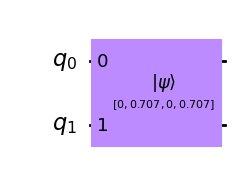

In [39]:
# Creating a quantum circuit with 2 qubit
qc = QuantumCircuit(2)
# initialize the quantum circuit's each qubit with the classical data.
qc.initialize(state, [0, 1])
qc.draw(output="mpl")

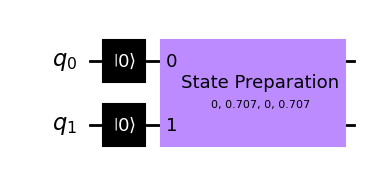

In [42]:
# To decompose one level (shallow decompose).
# Quantum Circuit with one level decompose.
qc.decompose().draw(output="mpl")


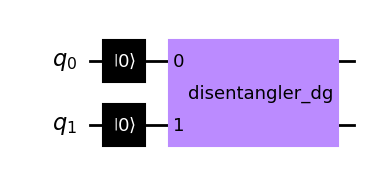

In [44]:
# circuit.decompose().decompose(). can decompose specific gates specific time
qc.decompose().decompose().draw(output="mpl")

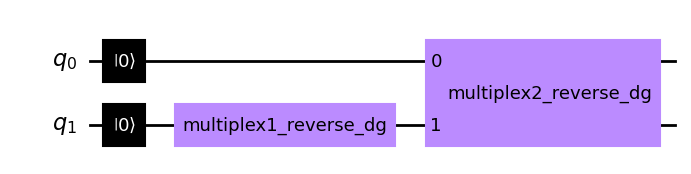

In [45]:
qc.decompose().decompose().decompose().draw(output="mpl")

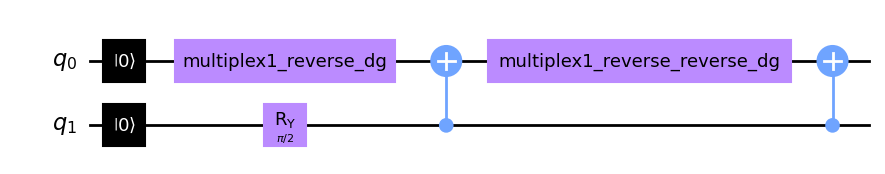

In [46]:
qc.decompose().decompose().decompose().decompose().draw(output="mpl")

### Amplitude Encoding
> Amplitude encoding encodes data into the amplitudes of a quantum state. It represents a normalised classical $N$-dimensional data point, $x$, as the amplitudes of a $n$-qubit quantum state, $|\psi_x\rangle$: $$|\psi_x\rangle = \sum_{i=1}^N x_i |i\rangle$$ where $N = 2^n$, $x_i$ is the $i^{th}$ element of $x$ and $|i\rangle$ is the $i^{th}$ computational basis state. 


In [29]:
state = [
    1 / math.sqrt(15.25) * 1.5,
    0,
    1 / math.sqrt(15.25) * -2,
    1 / math.sqrt(15.25) * 3]
display(state)

[0.3841106397986879, 0, -0.5121475197315839, 0.7682212795973759]

In [30]:
s = Statevector(state)
s.is_valid()

True

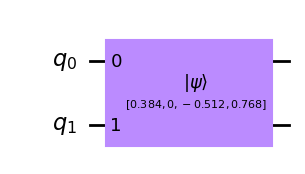

In [31]:
qc = QuantumCircuit(2)
qc.initialize(state, [0, 1])
qc.draw(output="mpl")

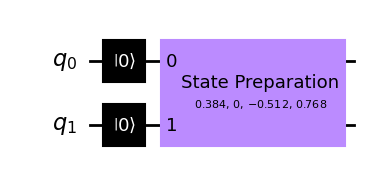

In [32]:
qc.decompose().draw(output="mpl")

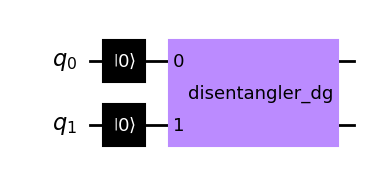

In [33]:
qc.decompose().decompose().draw(output="mpl")

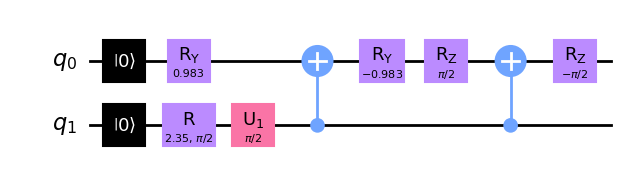

In [34]:
qc.decompose().decompose().decompose().decompose().decompose().draw(output="mpl")


### Angle Encoding

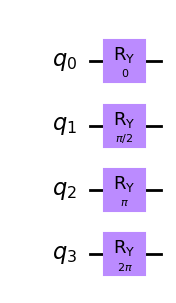

In [37]:
qc = QuantumCircuit(4)
qc.ry(0, 0)
qc.ry(2*math.pi/4, 1)
qc.ry(2*math.pi/2, 2)
qc.ry(2*math.pi, 3)
qc.draw(output="mpl")


### Arbitary Encoding
> Arbitrary encoding encodes $N$ features as rotations on $N$ parameterized gates on $n$ qubits, where $n \leq N$. Like angle encoding, it only encodes one data point at a time, rather than a whole dataset.

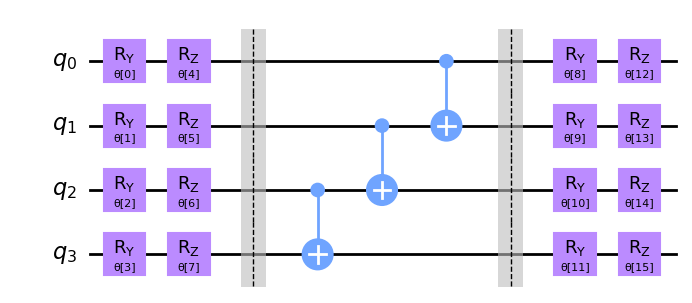

In [39]:
# Specifies how often the structure of a rotation layer followed by an entanglement
# The number of qubits of the EfficientSU2 circuit.
# If True, barriers are inserted in between each layer. If False,
qc = EfficientSU2(num_qubits=4, reps=1, insert_barriers=True)
qc.decompose().draw(output="mpl")

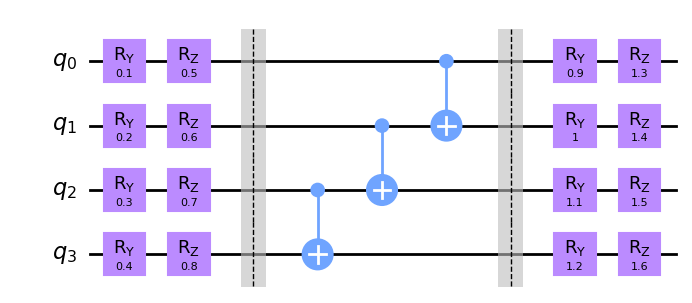

In [40]:
x = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6]
encode = qc.bind_parameters(x)
encode.decompose().draw(output="mpl")

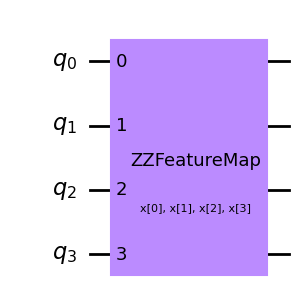

In [41]:
# Create a new second-order Pauli-Z expansion.
circuit = ZZFeatureMap(4, reps=1, insert_barriers=True)
circuit.draw(output="mpl")

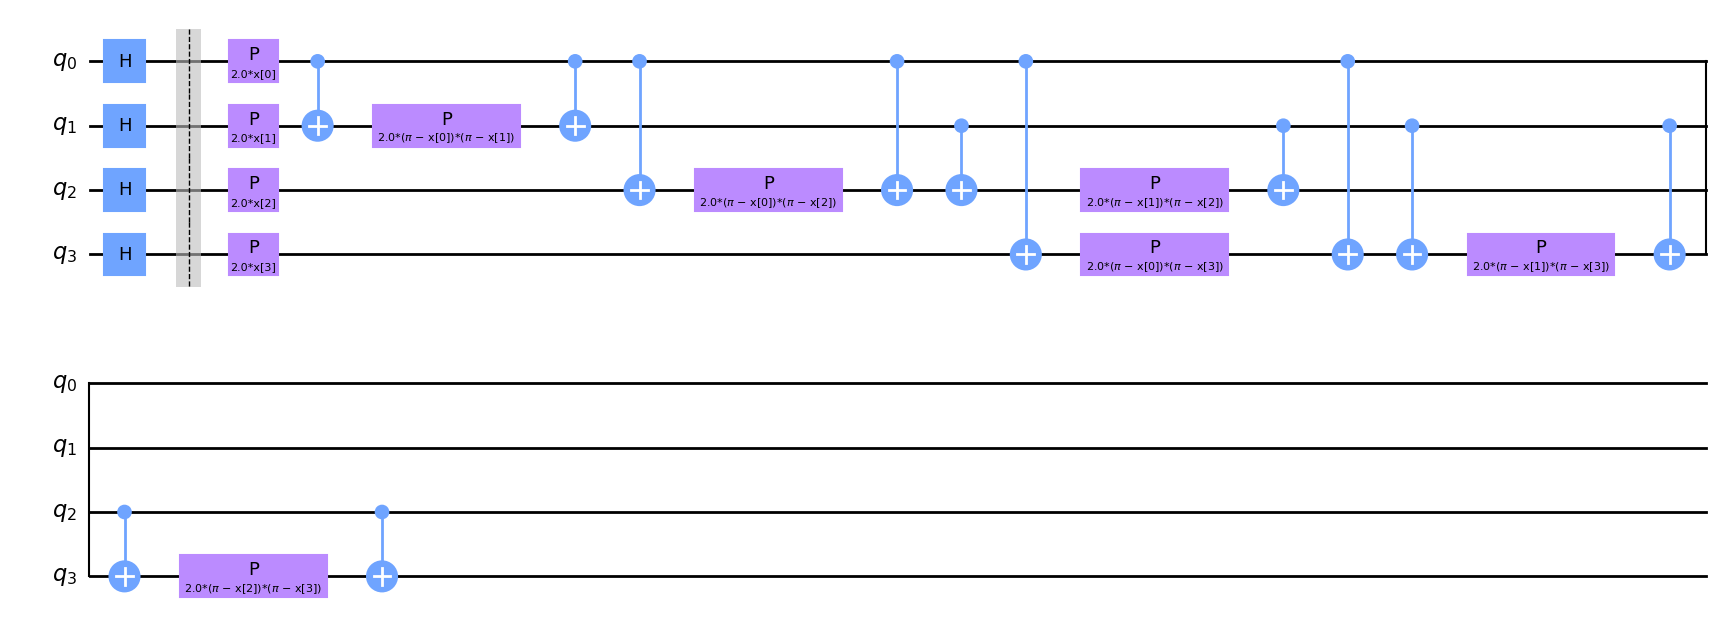

In [42]:
circuit.decompose().draw(output="mpl")


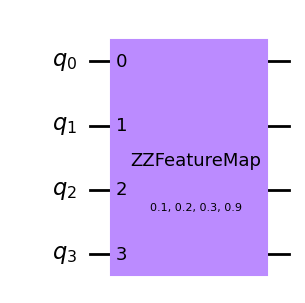

In [44]:
x = [0.1, 0.2, 0.3, 0.9]
encode = circuit.bind_parameters(x)
encode.draw(output="mpl")

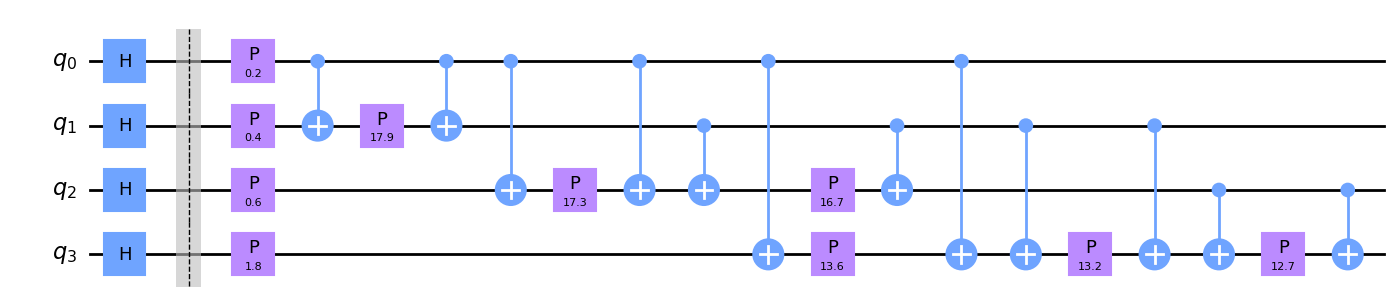

In [45]:
encode.decompose().draw(output="mpl")


In [46]:
import qiskit.tools.jupyter
%qiskit_version_table